In [ ]:
!pip install kaggle

In [ ]:
import json
import os

In [ ]:
kaggle_credentails = json.load(open("kaggle.json"))

os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [02:05<00:00, 24.0MB/s]
100% 2.70G/2.70G [02:05<00:00, 23.2MB/s]


In [ ]:
from zipfile import ZipFile

In [ ]:
# Unzip the downloaded dataset
with ZipFile("/content/new-plant-diseases-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras.optimizers import Adam

In [ ]:
train_path = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [ ]:
valid_path = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
# Load class names
class_names = training_set.class_names

# Check Class Distribution
def check_class_distribution(dataset, dataset_name):
    labels = []
    for images, label in dataset:
        labels.extend(np.argmax(label.numpy(), axis=1))
    class_counts = pd.Series(labels).value_counts().sort_index()
    class_counts.index = class_names
    print(f"\nClass Distribution in {dataset_name}:")
    print(class_counts)
    class_counts.plot(kind='bar', title=f'Class Distribution in {dataset_name}')
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()


Class Distribution in Training Set:
Apple___Apple_scab                                    2016
Apple___Black_rot                                     1987
Apple___Cedar_apple_rust                              1760
Apple___healthy                                       2008
Blueberry___healthy                                   1816
Cherry_(including_sour)___Powdery_mildew              1683
Cherry_(including_sour)___healthy                     1826
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot    1642
Corn_(maize)___Common_rust_                           1907
Corn_(maize)___Northern_Leaf_Blight                   1908
Corn_(maize)___healthy                                1859
Grape___Black_rot                                     1888
Grape___Esca_(Black_Measles)                          1920
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)            1722
Grape___healthy                                       1692
Orange___Haunglongbing_(Citrus_greening)              2010
Peach___Bacterial_s

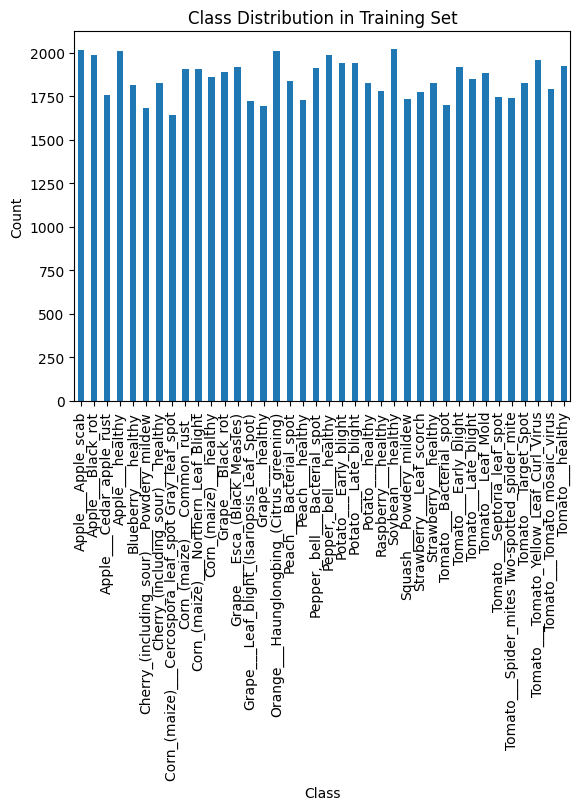


Class Distribution in Validation Set:
Apple___Apple_scab                                    504
Apple___Black_rot                                     497
Apple___Cedar_apple_rust                              440
Apple___healthy                                       502
Blueberry___healthy                                   454
Cherry_(including_sour)___Powdery_mildew              421
Cherry_(including_sour)___healthy                     456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot    410
Corn_(maize)___Common_rust_                           477
Corn_(maize)___Northern_Leaf_Blight                   477
Corn_(maize)___healthy                                465
Grape___Black_rot                                     472
Grape___Esca_(Black_Measles)                          480
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)            430
Grape___healthy                                       423
Orange___Haunglongbing_(Citrus_greening)              503
Peach___Bacterial_spot           

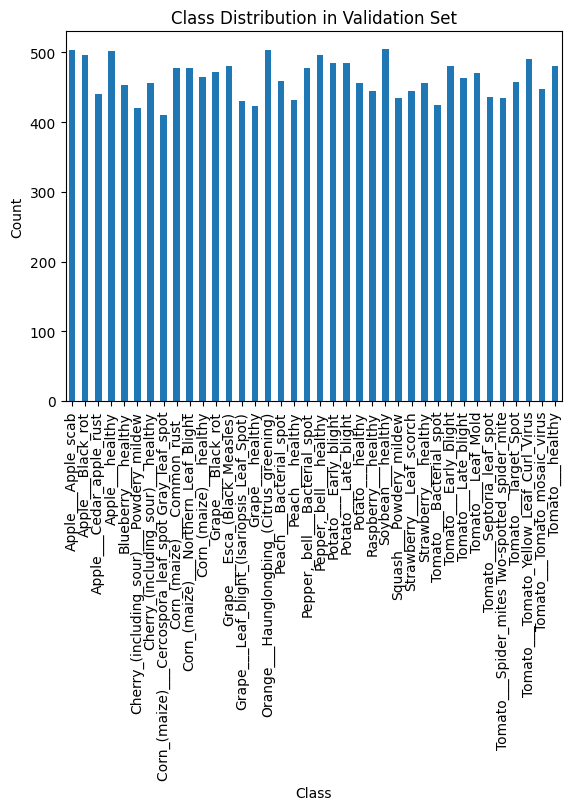

In [ ]:
check_class_distribution(training_set, "Training Set")
check_class_distribution(validation_set, "Validation Set")

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [ ]:
cnn.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 161s 67ms/step - accuracy: 0.3987 - loss: 2.1153 - val_accuracy: 0.8541 - val_loss: 0.4708
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 60ms/step - accuracy: 0.8432 - loss: 0.4943 - val_accuracy: 0.9242 - val_loss: 0.2430
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 132s 60ms/step - accuracy: 0.9097 - loss: 0.2831 - val_accuracy: 0.9485 - val_loss: 0.1567
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 153s 65ms/step - accuracy: 0.9385 - loss: 0.1893 - val_accuracy: 0.9442 - val_loss: 0.1714
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 65ms/step - accuracy: 0.9523 - loss: 0.1454 - val_accuracy: 0.9544 - val_loss: 0.1434
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 134s 61ms/step - accuracy: 0.9624 - loss: 0.1101 - val_accuracy: 0.9607 - val_loss: 0.1277
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 144s 65ms/step - accuracy: 0.9693 - loss: 0.0929 - val_accuracy: 0.9626 - val_loss: 0.1216
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 202s 65ms/step - accuracy: 

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', np.round(train_acc,4))
print('Training loss:', np.round(train_loss,4))


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 0.9942 - loss: 0.0184
Training accuracy: 0.9954
Training loss: 0.0151


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', np.round(val_acc,4))
print('Validation loss:', np.round(val_loss,4))


550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9759 - loss: 0.0822
Validation accuracy: 0.975
Validation loss: 0.0834


In [ ]:
!pip install lime shap

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import lime
import lime.lime_image
import shap
import cv2
from skimage.segmentation import mark_boundaries

In [ ]:
# Evaluate Model & Get Predictions
y_true = []
y_pred = []
for images, labels in validation_set:
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(cnn.predict(images), axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━

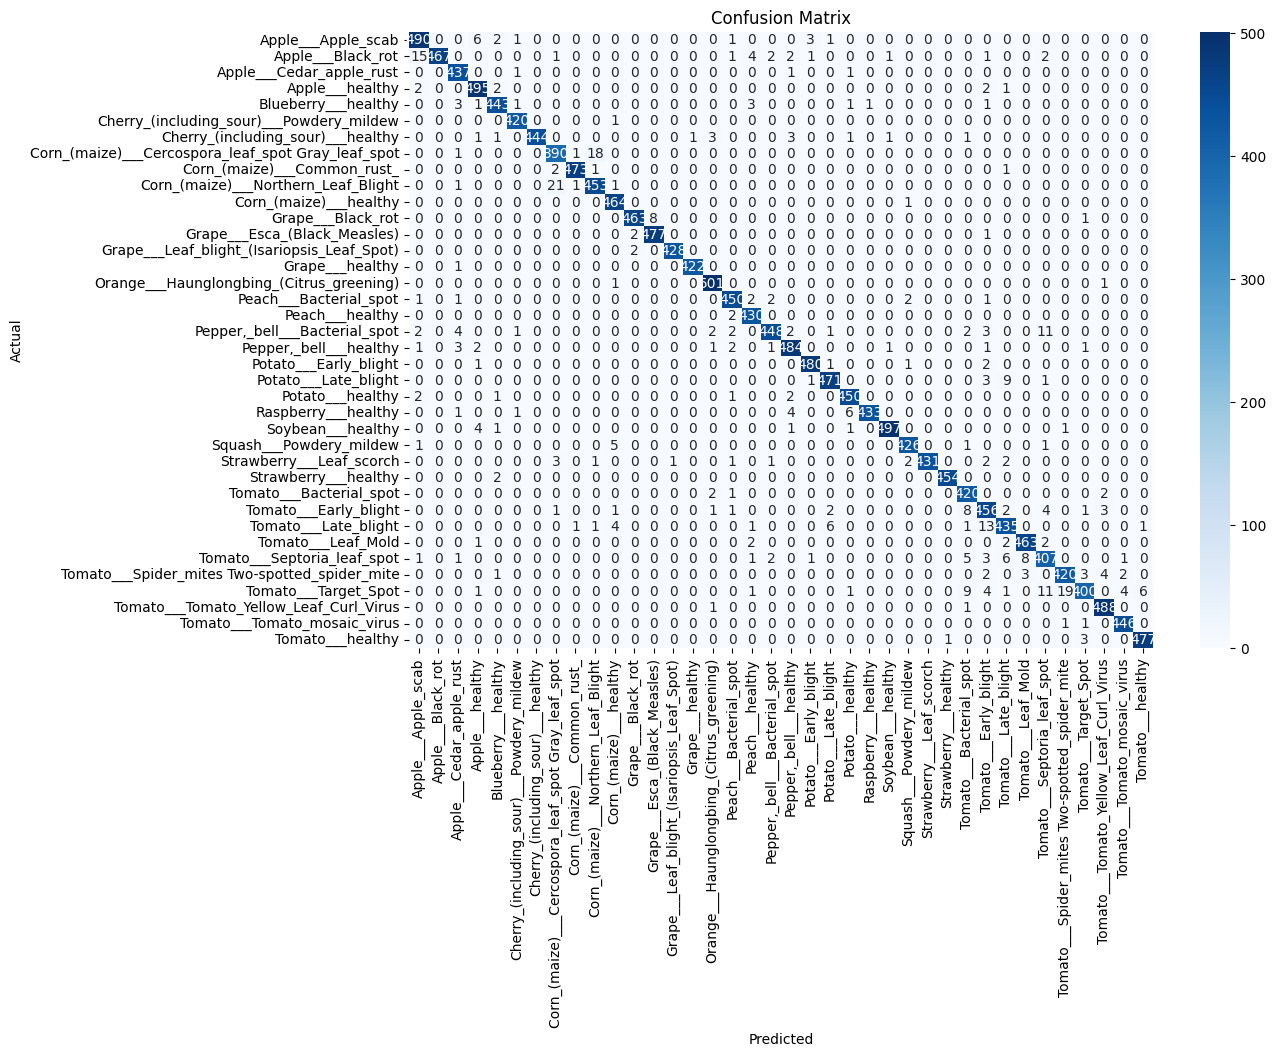

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
sensitivity = []
specificity = []

for i in range(len(class_names)):  # Loop through all classes
    TP = conf_matrix[i, i]
    FN = np.sum(conf_matrix[i, :]) - TP
    FP = np.sum(conf_matrix[:, i]) - TP
    TN = np.sum(conf_matrix) - (TP + FN + FP)

    sens = TP / (TP + FN) if (TP + FN) != 0 else 0
    spec = TN / (TN + FP) if (TN + FP) != 0 else 0

    sensitivity.append(sens)
    specificity.append(spec)

# Convert to NumPy for easy plotting
sensitivity = np.array(sensitivity)
specificity = np.array(specificity)

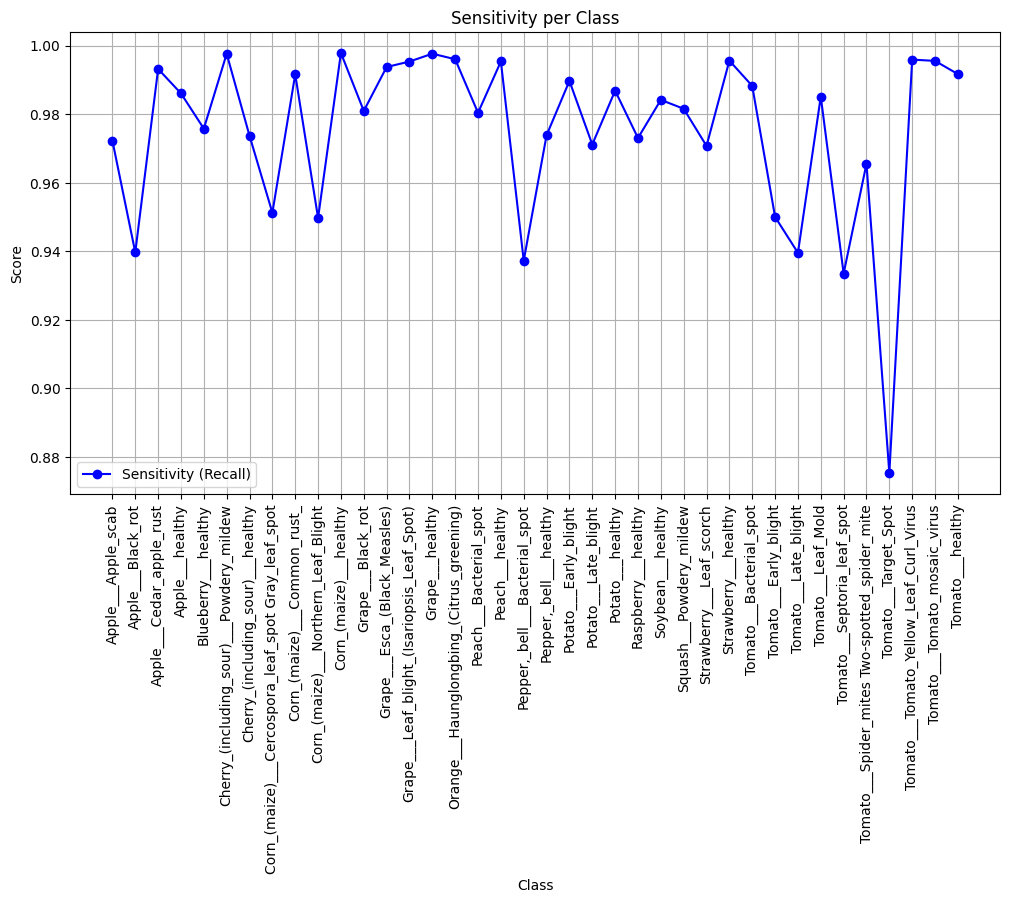

In [ ]:
# Plot Sensitivity & Specificity
plt.figure(figsize=(12, 6))
plt.plot(class_names, sensitivity, marker='o', label='Sensitivity (Recall)', color='blue')
plt.xticks(rotation=90)
plt.xlabel("Class")
plt.ylabel("Score")
plt.title("Sensitivity per Class")
plt.legend()
plt.grid()
plt.show()

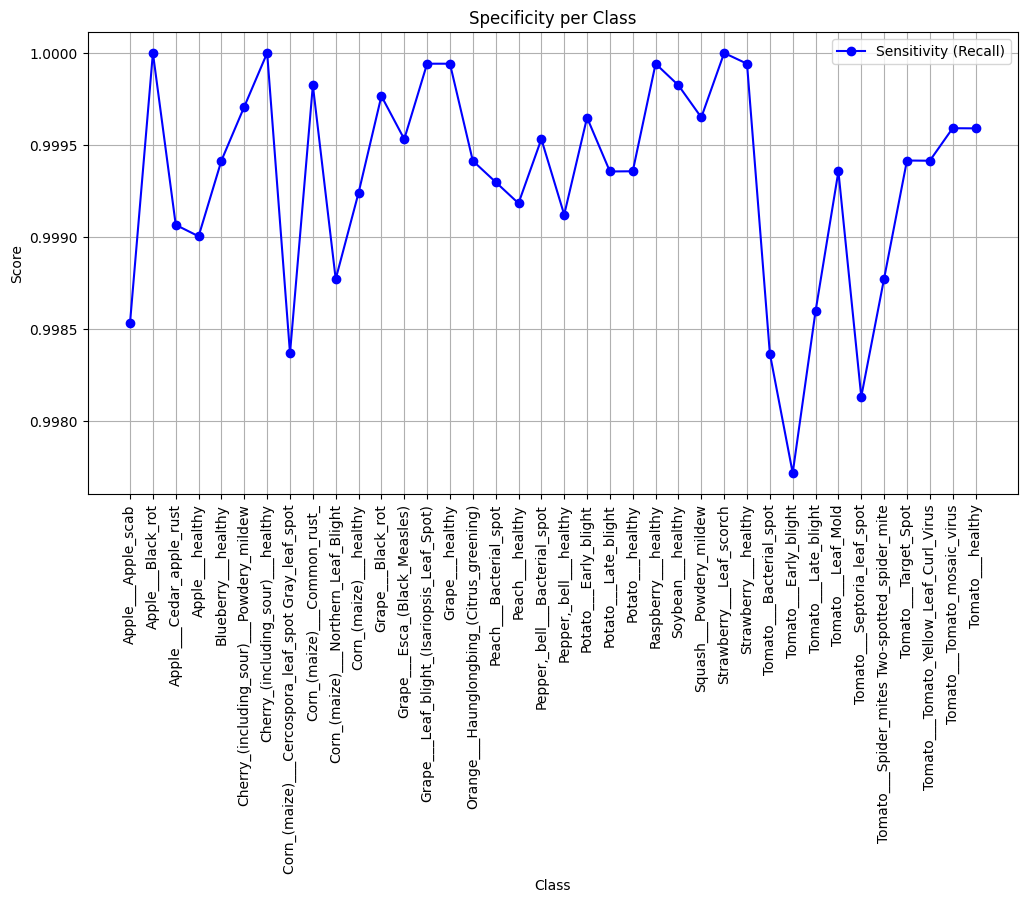

In [ ]:
# Plot Specificity
plt.figure(figsize=(12, 6))
plt.plot(class_names, specificity, marker='o', label='Sensitivity (Recall)', color='blue')
plt.xticks(rotation=90)
plt.xlabel("Class")
plt.ylabel("Score")
plt.title("Specificity per Class")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Print Sensitivity & Specificity values
for i, class_name in enumerate(class_names):
    print(f"Class: {class_name} - Sensitivity: {sensitivity[i]:.4f}, Specificity: {specificity[i]:.4f}")

Class: Apple___Apple_scab - Sensitivity: 0.9722, Specificity: 0.9985
Class: Apple___Black_rot - Sensitivity: 0.9396, Specificity: 1.0000
Class: Apple___Cedar_apple_rust - Sensitivity: 0.9932, Specificity: 0.9991
Class: Apple___healthy - Sensitivity: 0.9861, Specificity: 0.9990
Class: Blueberry___healthy - Sensitivity: 0.9758, Specificity: 0.9994
Class: Cherry_(including_sour)___Powdery_mildew - Sensitivity: 0.9976, Specificity: 0.9997
Class: Cherry_(including_sour)___healthy - Sensitivity: 0.9737, Specificity: 1.0000
Class: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot - Sensitivity: 0.9512, Specificity: 0.9984
Class: Corn_(maize)___Common_rust_ - Sensitivity: 0.9916, Specificity: 0.9998
Class: Corn_(maize)___Northern_Leaf_Blight - Sensitivity: 0.9497, Specificity: 0.9988
Class: Corn_(maize)___healthy - Sensitivity: 0.9978, Specificity: 0.9992
Class: Grape___Black_rot - Sensitivity: 0.9809, Specificity: 0.9998
Class: Grape___Esca_(Black_Measles) - Sensitivity: 0.9938, Specificity:


False Negatives (FN) for Each Class:
Class: Apple___Apple_scab - FN: 14
Class: Apple___Black_rot - FN: 30
Class: Apple___Cedar_apple_rust - FN: 3
Class: Apple___healthy - FN: 7
Class: Blueberry___healthy - FN: 11
Class: Cherry_(including_sour)___Powdery_mildew - FN: 1
Class: Cherry_(including_sour)___healthy - FN: 12
Class: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot - FN: 20
Class: Corn_(maize)___Common_rust_ - FN: 4
Class: Corn_(maize)___Northern_Leaf_Blight - FN: 24
Class: Corn_(maize)___healthy - FN: 1
Class: Grape___Black_rot - FN: 9
Class: Grape___Esca_(Black_Measles) - FN: 3
Class: Grape___Leaf_blight_(Isariopsis_Leaf_Spot) - FN: 2
Class: Grape___healthy - FN: 1
Class: Orange___Haunglongbing_(Citrus_greening) - FN: 2
Class: Peach___Bacterial_spot - FN: 9
Class: Peach___healthy - FN: 2
Class: Pepper,_bell___Bacterial_spot - FN: 30
Class: Pepper,_bell___healthy - FN: 13
Class: Potato___Early_blight - FN: 5
Class: Potato___Late_blight - FN: 14
Class: Potato___healthy - FN: 

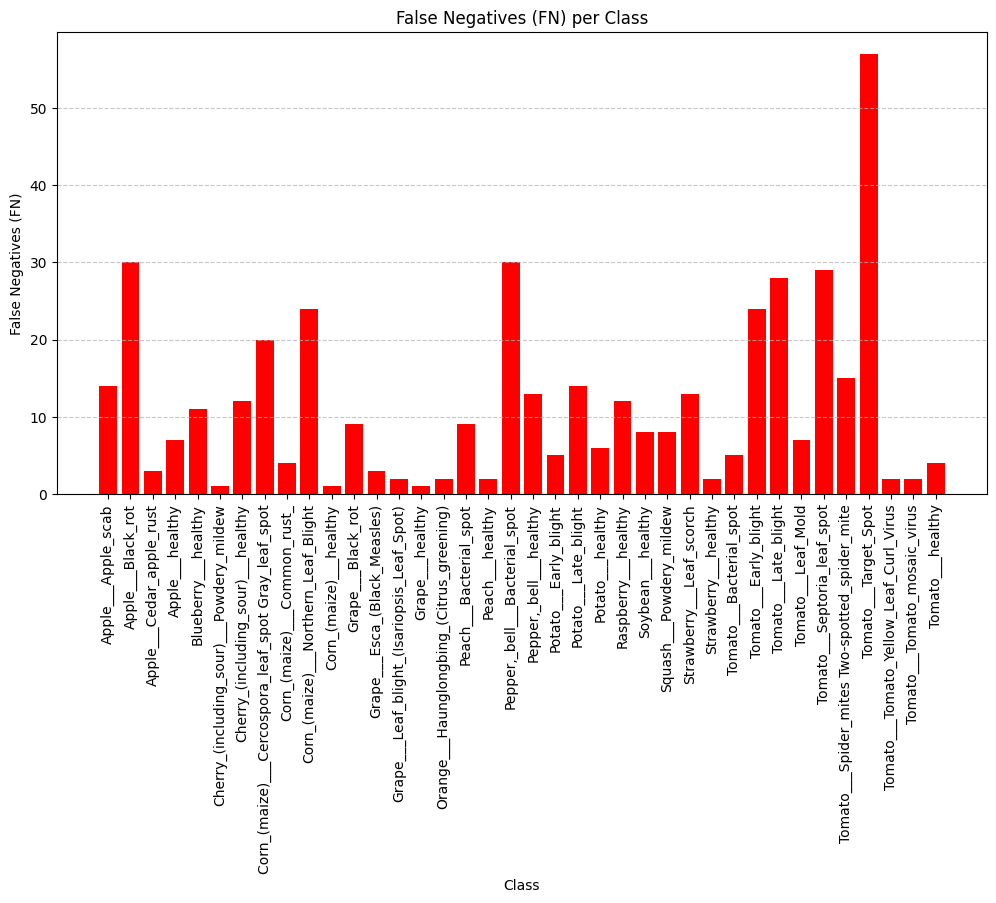

In [ ]:
# Calculate False Negatives (FN) for each class
FN_values = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)  # FN = sum of row - TP

# Print FN values for each class
print("\nFalse Negatives (FN) for Each Class:")
for i, class_name in enumerate(class_names):
    print(f"Class: {class_name} - FN: {FN_values[i]}")

# Plot FN values for all 38 classes
plt.figure(figsize=(12, 6))
plt.bar(class_names, FN_values, color='red')
plt.xticks(rotation=90)
plt.xlabel("Class")
plt.ylabel("False Negatives (FN)")
plt.title("False Negatives (FN) per Class")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
average_FN = np.mean(FN_values)
print("Average FN values :",average_FN)

Average FN values : 11.552631578947368


In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.97      0.96       504
                                 Apple___Black_rot       1.00      0.94      0.97       497
                          Apple___Cedar_apple_rust       0.96      0.99      0.98       440
                                   Apple___healthy       0.97      0.99      0.98       502
                               Blueberry___healthy       0.98      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      1.00      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.97      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.95      0.94       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight     

In [ ]:
#Saving the model
import pickle

with open("final_cnn_model.pkl", "wb") as f:
    pickle.dump(cnn, f)

In [2]:
import streamlit as st
from  PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import json


In [7]:
with open('data.json', 'r') as file:
    data = json.load(file)  

model = load_model('models\my_model_1.keras')

class_names = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)','Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus','Tomato___healthy']


<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
C:\Users\siddh\AppData\Local\Temp\ipykernel_21648\1119466680.py:4: SyntaxWarning: invalid escape sequence '\m'
  model = load_model('models\my_model_1.keras')


In [5]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    # Load the image
    img = Image.open(image_path)
    
    # Resize the image
    img = img.resize(target_size)
    
    # Convert the image to a numpy array
    img_array = np.array(img)
    
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
# Example Usage
image_path = 'D:\SDBI\Sem 6\AI\Assignment\case study\\test_images\Apple___Apple_scab.JPG'

predicted_class_name = predict_image_class(model, image_path, class_names)

# Output the result
print("Predicted Class Name:", predicted_class_name)

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\siddh\AppData\Local\Temp\ipykernel_21648\2533803012.py:2: SyntaxWarning: invalid escape sequence '\S'
  image_path = 'D:\SDBI\Sem 6\AI\Assignment\case study\\test_images\Apple___Apple_scab.JPG'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
Predicted Class Name: Squash___Powdery_mildew
